<a href="https://colab.research.google.com/github/Sid-2862/Deep-Learning/blob/main/Multi_class_classification_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiclass Classification

In [1]:
path = "https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/mobile_train%20(1).csv"
import pandas as pd
df = pd.read_csv(path)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Target feature: Price range
    0   cheap
    1   Good price
    2   Expensive

# Perform basic data quality checks

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [3]:
df.shape

(2000, 21)

In [5]:
# checking for missing values & duplicated data
df.isna().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [6]:
df.duplicated().sum()

np.int64(0)

## There are no missing values nor any duplicated data present in this dataset

# Separate x & y features

In [7]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
x = df.drop(columns=['price_range'])
y = df[['price_range']]

In [9]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [10]:
y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


In [11]:
x.dtypes

,0
battery_power,int64
blue,int64
clock_speed,float64
dual_sim,int64
fc,int64
four_g,int64
int_memory,int64
m_dep,float64
mobile_wt,int64
n_cores,int64


# Data Prepocessing & Data Cleaning

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [14]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
).set_output(
    transform='pandas'
)


In [15]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [16]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


# perform train test split

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_pre,y,train_size=0.8,random_state=42)

In [18]:
xtrain.shape

(1600, 20)

In [19]:
xtest.shape

(400, 20)

# Preprocess  y data

In [20]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [21]:
ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [23]:
ytrain_cat

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

## Model building using Keras

In [24]:
from keras.models import  Sequential
from keras.layers import Input,Dense,Dropout
from keras.callbacks import EarlyStopping

In [25]:
ytrain_cat.shape

(1600, 4)

In [27]:
# initialize the model
model = Sequential()

# add input layer
model.add(Input(shape=(xtrain.shape[1],)))

# add the dense layer (hidden layer)
model.add(Dense(units=64,activation="relu"))

# add the dropout layer
model.add(Dropout(rate=0.3))

# add the dense layer (hidden layer)
model.add(Dense(units=32,activation="relu"))

# add the dropout layer
model.add(Dropout(rate=0.3))

# add the dense layer (hidden layer)
model.add(Dense(units=ytrain_cat.shape[1],activation="softmax"))

In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,556 (13.89 KB)

 Trainable params: 3,556 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
from warnings import filterwarnings
filterwarnings("ignore")

In [30]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [31]:
es = EarlyStopping(monitor="val_loss",patience=10)

In [32]:
hist = model.fit(xtrain,ytrain_cat,validation_split=0.2,epochs=100,callbacks=[es])

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.2798 - loss: 1.5111 - val_accuracy: 0.4062 - val_loss: 1.2764
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3778 - loss: 1.2830 - val_accuracy: 0.5219 - val_loss: 1.1601
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4668 - loss: 1.1845 - val_accuracy: 0.5750 - val_loss: 1.0350
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5585 - loss: 0.9972 - val_accuracy: 0.6031 - val_loss: 0.9082
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5714 - loss: 0.9200 - val_accuracy: 0.6844 - val_loss: 0.7911
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6119 - loss: 0.8442 - val_accuracy: 0.7437 - val_loss: 0.7021
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6617 - loss: 0.7715 - val_accuracy: 0.7875 - val_loss: 0.6207
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7470 - loss: 0.6468 - val_accuracy: 0.8188 - 

# Learning Curve

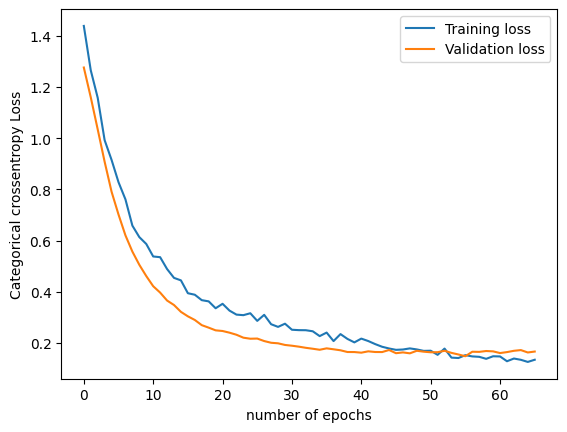

In [33]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"],label="Training loss")
plt.plot(hist.history["val_loss"],label="Validation loss")
plt.xlabel("number of epochs")
plt.ylabel("Categorical crossentropy Loss")
plt.legend()
plt.show()

# Evaluate the model

In [34]:
model.evaluate(xtrain,ytrain_cat)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9975 - loss: 0.0365


[0.059791237115859985, 0.9831249713897705]

In [35]:
model.evaluate(xtest,ytest_cat)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9462 - loss: 0.1407


[0.14854593575000763, 0.9325000047683716]

# Predictions

In [36]:
ypreds_test = model.predict(xtest)
ypreds_test[:5]

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[9.9079907e-01, 9.2009678e-03, 2.2790685e-10, 5.2187876e-26],
       [3.1749872e-09, 1.8227997e-03, 9.9407661e-01, 4.1006091e-03],
       [8.9563644e-03, 9.9006021e-01, 9.8342251e-04, 6.5402902e-13],
       [7.0236903e-28, 1.7446352e-15, 2.1945271e-03, 9.9780542e-01],
       [4.2062116e-04, 9.9153495e-01, 8.0444217e-03, 2.0595425e-09]],
      dtype=float32)

In [37]:
import numpy as np
np.max(ypreds_test,axis=1)

array([0.99079907, 0.9940766 , 0.9900602 , 0.9978054 , 0.99153495,
       0.9920427 , 0.66538715, 0.9952689 , 0.96412593, 0.97746605,
       0.9801502 , 0.8780083 , 0.9959913 , 0.999905  , 0.61254925,
       0.9430381 , 0.99828964, 0.99978083, 0.99847466, 0.9984653 ,
       0.99758005, 0.63953143, 0.5926699 , 0.9929738 , 0.99459827,
       0.9889199 , 0.911077  , 0.5315653 , 0.89527655, 0.9981754 ,
       0.97102284, 0.99996054, 0.9986266 , 0.9925189 , 0.98207927,
       0.9952341 , 0.76722294, 0.99548304, 0.99955696, 0.94492155,
       0.6341579 , 0.9800054 , 0.9812091 , 0.99974185, 0.7719877 ,
       0.866127  , 0.9970655 , 0.9528102 , 0.9990421 , 0.9970149 ,
       0.99991   , 0.9914431 , 0.9974624 , 0.9940356 , 0.76552546,
       0.6870555 , 0.99632746, 0.9562535 , 0.99992645, 0.9989536 ,
       0.9459371 , 0.99984145, 0.9842928 , 0.98567593, 0.9925754 ,
       0.9783546 , 0.9998994 , 0.9994667 , 0.9948356 , 0.9874971 ,
       0.9416979 , 0.9992569 , 0.99978596, 0.9771299 , 0.98864

In [39]:
ypreds_test_final = np.argmax(ypreds_test,axis=1)
ypreds_test_final

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 3, 2, 3, 3, 1, 0, 0, 2,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       3, 3, 2, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 1, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 1, 2, 3, 1, 3, 2, 0, 0, 0, 1, 2, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 3, 1, 0, 0, 2, 2, 3, 3, 1, 0, 0, 3, 1,
       1, 2, 1, 1, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 1, 2, 2, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 2, 2,
       3, 2, 3, 0, 2, 3, 2, 3, 2, 1, 0, 2, 0, 2, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 2, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [40]:
ypreds_test_final[:5]

array([0, 2, 1, 3, 1])

In [41]:
ytest.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


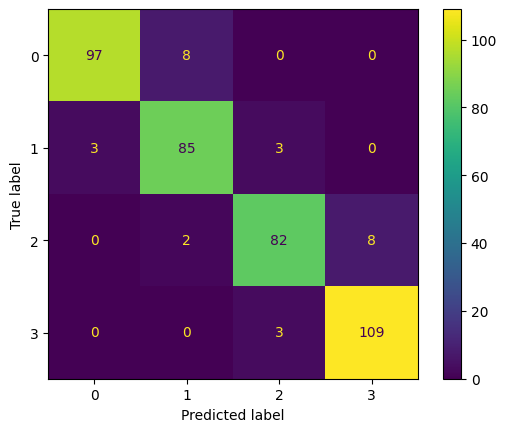

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cf = confusion_matrix(ytest,ypreds_test_final)
ConfusionMatrixDisplay(cf).plot()

In [44]:

from sklearn.metrics import classification_report
print(classification_report(ytest,ypreds_test_final))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       105
           1       0.89      0.93      0.91        91
           2       0.93      0.89      0.91        92
           3       0.93      0.97      0.95       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



# Save the model for final out of sample predictions

In [45]:
model.save("mobile prediction.keras")

In [46]:
from keras.models import load_model


In [47]:
m1 = load_model('/content/mobile prediction.keras')
m1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,670 (41.68 KB)

 Trainable params: 3,556 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,114 (27.79 KB)

In [48]:
path2 = "https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/mobile_test%20(1).csv"
xnew = pd.read_csv(path2)
xnew.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [49]:

xnew = xnew.drop(columns=["id"])
xnew.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [50]:

xnew_pre = num_pipe.transform(xnew)
xnew_pre

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.445060,1.010051,0.340463,0.981177,2.232650,-1.043966,-1.490890,-1.393304,1.490528,-0.664768,1.003414,-0.944639,0.371413,1.246506,-0.072765,0.283103,-1.649584,-1.786861,0.994018,-1.014099
1,-0.904874,1.010051,-1.253064,0.981177,-0.071307,0.957886,1.596010,1.034357,1.434017,0.209639,0.343653,0.227403,-0.913037,1.632873,-1.497202,-1.324131,-0.734267,0.559641,-1.006018,-1.014099
2,1.294038,1.010051,1.566254,-1.019184,-0.762495,-1.043966,-0.278179,1.381165,1.292737,-0.664768,-0.975869,1.408462,0.264954,0.250619,1.114266,0.971917,-0.185077,-1.786861,0.994018,0.986097
3,0.699922,-0.990050,-1.253064,0.981177,3.154233,0.957886,-0.388426,-0.006069,-1.250297,1.521249,1.663176,-0.789118,1.158284,1.631029,-0.547577,-1.324131,-0.734267,0.559641,0.994018,-1.014099
4,0.444976,-0.990050,-0.149853,-1.019184,1.541463,0.957886,0.934531,-0.006069,-0.911225,0.646842,1.333295,0.234165,-1.021810,-0.323860,0.639453,0.512708,-0.734267,0.559641,-1.006018,0.986097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.050473,1.010051,0.463042,-1.019184,-0.992890,0.957886,1.210147,-0.006069,0.840642,1.084046,1.168355,-0.002497,-0.783435,-0.002963,0.402047,0.512708,0.730240,0.559641,0.994018,-1.014099
996,-1.432976,-0.990050,0.340463,0.981177,-0.992890,-1.043966,-1.049904,1.381165,1.292737,-0.227564,-1.305750,1.142498,0.880565,-0.176321,-1.022389,-1.094526,1.462493,-1.786861,0.994018,0.986097
997,-0.121824,-0.990050,-0.149853,-1.019184,-0.762495,0.957886,-1.325520,-0.006069,-1.702391,-1.539175,0.343653,-0.378903,-0.987096,-0.831024,-1.734608,-1.324131,0.547176,0.559641,-1.006018,-1.014099
998,0.670330,1.010051,-1.253064,0.981177,-0.992890,-1.043966,0.989655,-0.352878,0.868898,-1.101971,0.343653,-1.368378,-0.970895,0.354819,0.639453,1.201522,-0.917331,-1.786861,0.994018,-1.014099


In [51]:
final_preds = m1.predict(xnew_pre)
final_preds[:10]

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


array([[1.4059792e-19, 4.1558182e-10, 1.6979398e-01, 8.3020610e-01],
       [8.6706966e-25, 3.9811172e-13, 8.8788960e-03, 9.9112105e-01],
       [3.8638308e-17, 1.1431611e-07, 8.2420647e-01, 1.7579339e-01],
       [5.5462954e-37, 1.9573827e-20, 8.8709727e-05, 9.9991131e-01],
       [2.6413216e-03, 9.9221873e-01, 5.1399642e-03, 7.7090290e-10],
       [2.5576342e-25, 9.6845898e-14, 4.6536522e-03, 9.9534637e-01],
       [2.3460176e-38, 3.5123882e-21, 5.9820686e-05, 9.9994016e-01],
       [1.5736547e-04, 9.9946922e-01, 3.7340238e-04, 2.6301576e-12],
       [5.6918877e-23, 1.6508068e-12, 8.4462026e-03, 9.9155384e-01],
       [9.8890209e-01, 1.1097910e-02, 3.9611636e-10, 5.4088934e-28]],
      dtype=float32)

In [54]:

final_price = np.argmax(final_preds,axis=1)
final_price[:1]

array([3])

# Save the predictions to dataframe and then save the results

In [56]:

xnew["Price Range"] = final_price
xnew.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Price Range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


In [57]:

xnew.to_csv("PriceRange Results.csv")